# 카카오 가만든 library를 이용한 GPT, 및 이미지 생성 실습
 - ref: https://wooiljeong.github.io/python/pykakao-message/
 - ref: https://github.com/K-Junyyy/MUSINSA-CRWALING

In [1]:
!pip install PyKakao

## 02. KoGPT를 이용한 자연어 생성

In [2]:
from PyKakao import KoGPT

GPT = KoGPT(service_key = "6ffdaa0ab320548eab2c8b3494991f3f")

# 다음 문장 만들기
prompt = "서울과기대에 대해서 설명해줘"
max_tokens = 64
result = GPT.generate(prompt, max_tokens, temperature=0.7, top_p=0.8)

In [3]:
result

{'id': '11f1fdd7-c0fb-42cb-8a9e-49c2c9835762',
 'generations': [{'text': '. 서울과학기술대학교는 서울특별시 노원구 공릉동에 있으며, 국내에서 유일하게 이공계 특성화 대학이다(http://www.scnu.ac). 공과대학은 공학계열로 구성되어있고 바이오시스템·재료공학부와 에너지바이오학과가 설치된 융합학부로',
   'tokens': 64}],
 'usage': {'prompt_tokens': 8, 'generated_tokens': 64, 'total_tokens': 72}}

## 03. 이미지 생성

 - Karlo API는 사용자가 입력한 문장과 이미지를 기반으로 새로운 이미지를 만드는 기능을 제공합니다. 생성형 인공지능(AI) Karlo는 1억 8천만 장 규모의 이미지-텍스트 학습을 통해 사용자가 묘사한 내용을 이해하고, 픽셀 단위로 완전히 새로운 이미지를 생성합니다. 또한 사용자가 원하는 콘셉트에 맞춰 창작 활동을 할 수 있도록 사물, 배경, 조명, 구도, 다양한 화풍을 지원합니다.

In [51]:
from PyKakao import Karlo
from PIL import Image

# Karlo API 인스턴스 생성
api = Karlo("6ffdaa0ab320548eab2c8b3494991f3f")

# 프롬프트에 사용할 제시어
text = "Drawing a cute Marty Moose for my 2 years old baby with a Pixar concept"

# 이미지 생성하기 REST API 호출
img_dict = api.text_to_image(text, 1)

# 생성된 이미지 정보
img_str = img_dict.get("images")[0].get('image')

# base64 string을 이미지로 변환
img = api.string_to_image(base64_string = img_str, mode = 'RGBA')

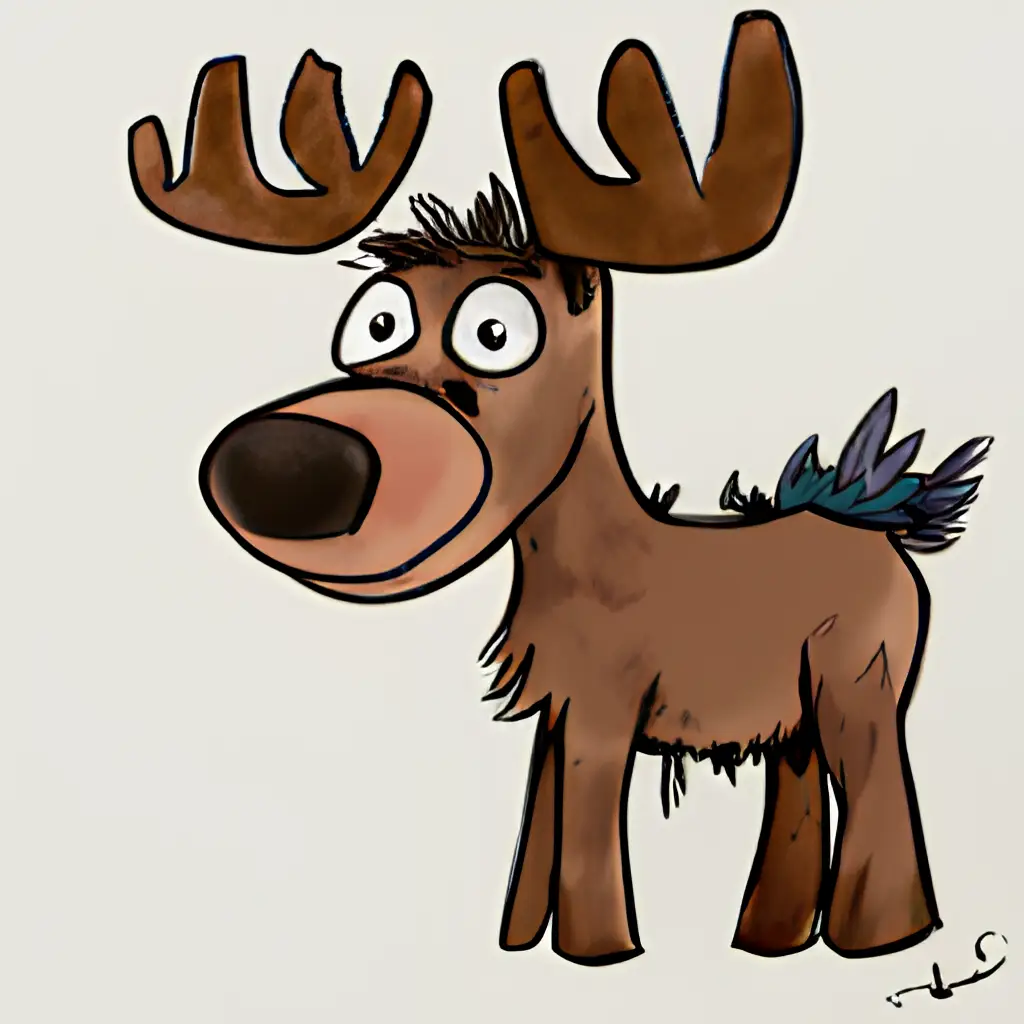

In [52]:
img

In [6]:
# 이미지 파일 불러오기
img = Image.open('./original.png')

# 이미지를 Base64 인코딩하기
img_base64 = api.image_to_string(img)

In [15]:
img_base64

'iVBORw0KGgoAAAANSUhEUgAABAAAAAQACAYAAAB/HSuDAAEAAElEQVR4nOz9S5MkubKli32qAMw9\nIjKzHvvs0923Sbkt5IhTDsj//x8444jCK/d2s89jn72rMiPcDKocKGBmbu4eHpGRWZlV5VoS5ekP\ne8EAGFR1raXyf/nP/zfnVaZH79zkwvcWL2LH7zfbi1za/mUm8srTP9n+dcfTzeFE5dnvr5nN7fN5\ndtp+z9uXPv/XHv9L21uP/9r7/6XN/a33/9ue/1vtzfdP37a9vvH4/sbjf8YBr/zglf3hjef/+vlr\nO/9vzvfq9W1391vfv835adruMF5Pnnvn2+mk/55c/5X2eePzw/1tz8+39n/9zOf3tt9cmkcuzQ/b\n31/afjs/bE9XN/e1f+9ts7486u9PL9fa8eN6EmlzPst1mhlucc9MjIQgruwpFEvsvfIgT7wvB/7b\nf3nHf/tfhf/n/+NHNP3byXFd4t5pVkrJ7MrAkDLZE4wT9bFSHycOvz5ijyN1rEyfRqZfD8hkiLXr\ntthxdcfMwAQ3Q9u1pnb+6u1ZZ467ICTUFRUn+4TqE64T0yDYu3fw8195+um/8et//r8zffiv3N3v\nGIaBpKApoWlpIxVBxNGUGIZMKZlUEpp0af9ts/c21d7+cvSqkjE3xBzMyWbABNMBxk/w9ATjCE8T\nPI7w6yf8aUQex2gTB6xi7u1+xX1zk3nMuRvT5EzjyDhNWHWqCyKCieIe790db+1YW0fq+6gX5hXV\n436kbWEn4qScKUVJKTPsd+zv79i/u0PvdjAoqFHVMCqmhpsjrrgL08EZR2ccjcdPE4+fDkyTxTWa\nxTWYLdfYb0Cbp6T1b6e279vvmDBzpsOBaZyo4xM2HbBppJoxHR6p0zT3N8XwOlE//Z369JH69BE7\nfMSffkGmCcGirQ3cBZvHkR61X7f5/Wp+7dfxkjVaH799/Ty3+3a+2M4zetzv5o9

In [22]:
# 이미지 변환하기 REST API 호출
response = api.transform_image(image = img_base64, batch_size=1)

# 응답의 첫 번째 이미지 생성 결과 출력하기
result = api.string_to_image(response.get("images")[0].get("image"), mode = 'RGB')

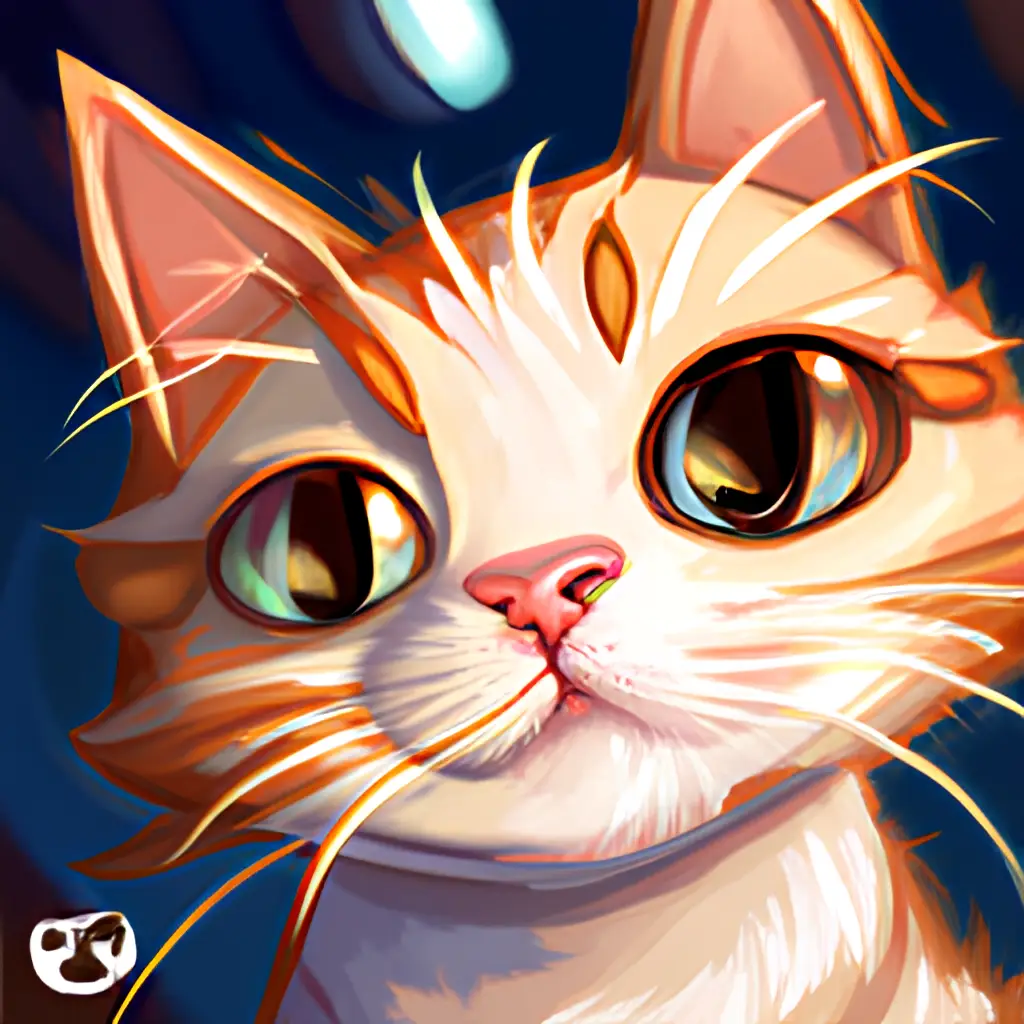

In [23]:
result

In [47]:
from PyKakao import Karlo
from PIL import Image

# Karlo API 인스턴스 생성
api = Karlo("6ffdaa0ab320548eab2c8b3494991f3f")

# 이미지 파일 불러오기
img = Image.open('./original.png')
mask = Image.open('./bear.png')

# 이미지를 Base64 인코딩하기
img_base64 = api.image_to_string(img)
mask_base64 = api.image_to_string(mask)

# 프롬프트에 사용할 제시어
text = "upper right"

# 이미지 변환하기 REST API 호출
response = api.inpaint_image(image = img_base64, mask = mask_base64, text = text, batch_size = 1)

# 응답의 첫 번째 이미지 생성 결과 출력하기
result = api.string_to_image(response.get("images")[0].get("image"), mode = 'RGB')

In [43]:
result_all = api.string_to_image(response["images"][0]["image"], mode = 'RGB')

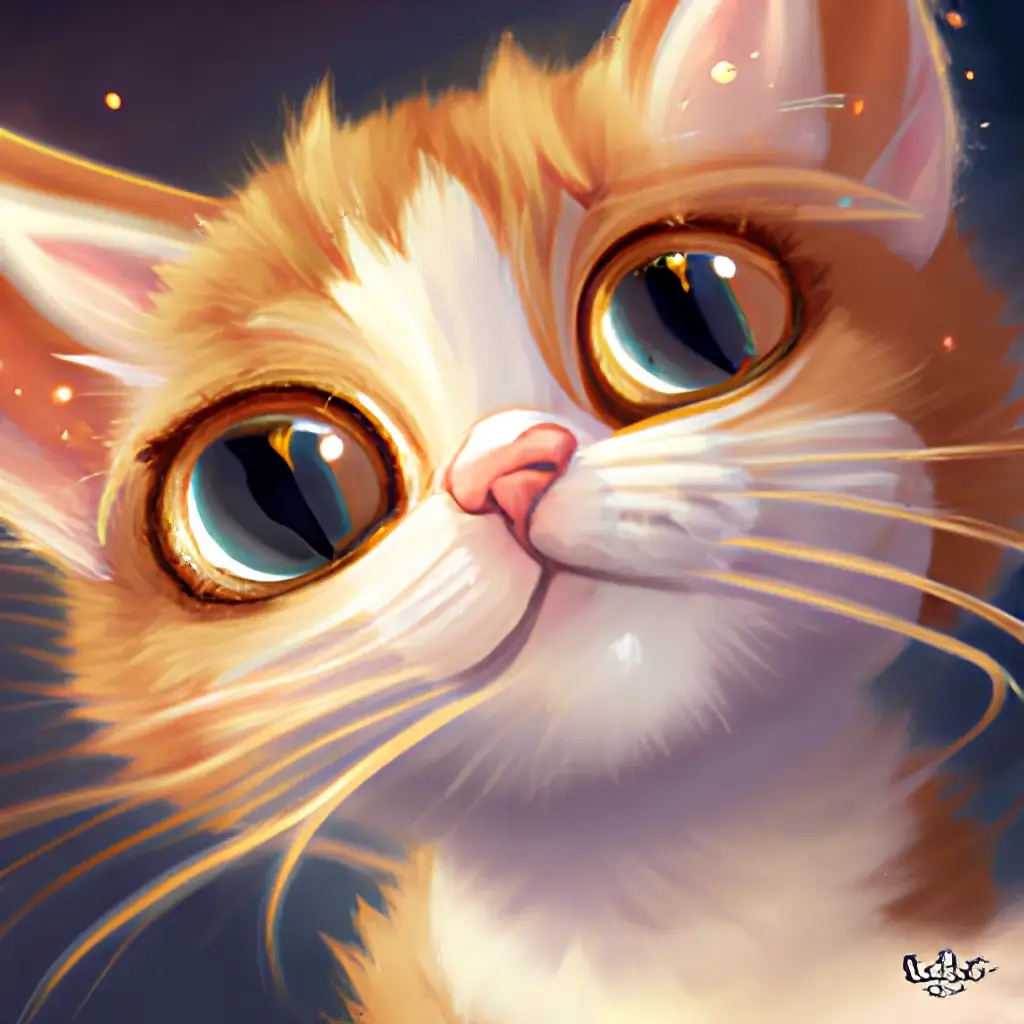

In [48]:
result